In [1]:
%env KMP_DUPLICATE_LIB_OK=TRUE
%load_ext autoreload
%autoreload 2

import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from fourier_koopman.NFMD import NFMD
from fourier_koopman.NFMDPixel import NFMDPixel

env: KMP_DUPLICATE_LIB_OK=TRUE


In [2]:
# Set plotting parameters
global_params = {'figure.dpi': 300,
                 'text.usetex': True,
                 'text.latex.preamble': r"\usepackage{amsmath}",
                 'font.family': 'sans-serif',
                 'savefig.dpi': 300,
                 'savefig.bbox': 'tight',
                 'savefig.pad_inches': 0.025,
                 'savefig.transparent': True,
                 #'font.sans-serif': 'Computer Modern Roman',
                }

full_params = {'figure.figsize': (7.3, 3.65),
               'figure.titlesize': 12,
               'axes.labelsize': 10,
               'axes.titlesize': 12,
               'legend.fontsize': 10,
               'xtick.labelsize': 12,
               'ytick.labelsize': 12,
              }

half_params = {'figure.figsize': (3.5, 2.5),
               'figure.titlesize': 10,
               'lines.linewidth' : 1,
               'lines.markersize' : 6,
               'lines.markeredgewidth': 0.5,
               'axes.labelsize': 9,
               'axes.titlesize': 9,
               'axes.linewidth': 0.5,
               'legend.fontsize': 9,
               'xtick.labelsize': 9,
               'ytick.labelsize': 9,
               'xtick.major.width': 0.5,
               'ytick.major.width': 0.7,
               'ytick.minor.width': 0.5,
               'ytick.major.pad': 0.0,
              }

# Add global parameters to the full_params and half_params dictionaries
full_params.update(global_params)
half_params.update(global_params)

# Set up boxplot-specific options
boxplot_params={'boxplot.boxprops.linewidth': 0.5,
                'boxplot.whiskerprops.linewidth': 0.5,
                'boxplot.capprops.linewidth': 0.5,
                'boxplot.medianprops.linewidth' : 0.5,
               }

# Boolean determining if figures should be saved (all figures or summary-only)
saveallfigs = True
savesumfigs = False

# Then update pyplot rcParams with the dictionary:
plt.rcParams.update(full_params)

In [3]:
# Experimental data examples
folder = "./ExptData/point_scans/"
fns = os.listdir(folder)

# Load in file and average trials
z = np.load(folder+fns[0])
z = z.flatten()

# Define a time vector:
fs = 10e6
n = z.shape[0]
t = np.linspace(0, n/fs, n)
dt = t[1]-t[0]

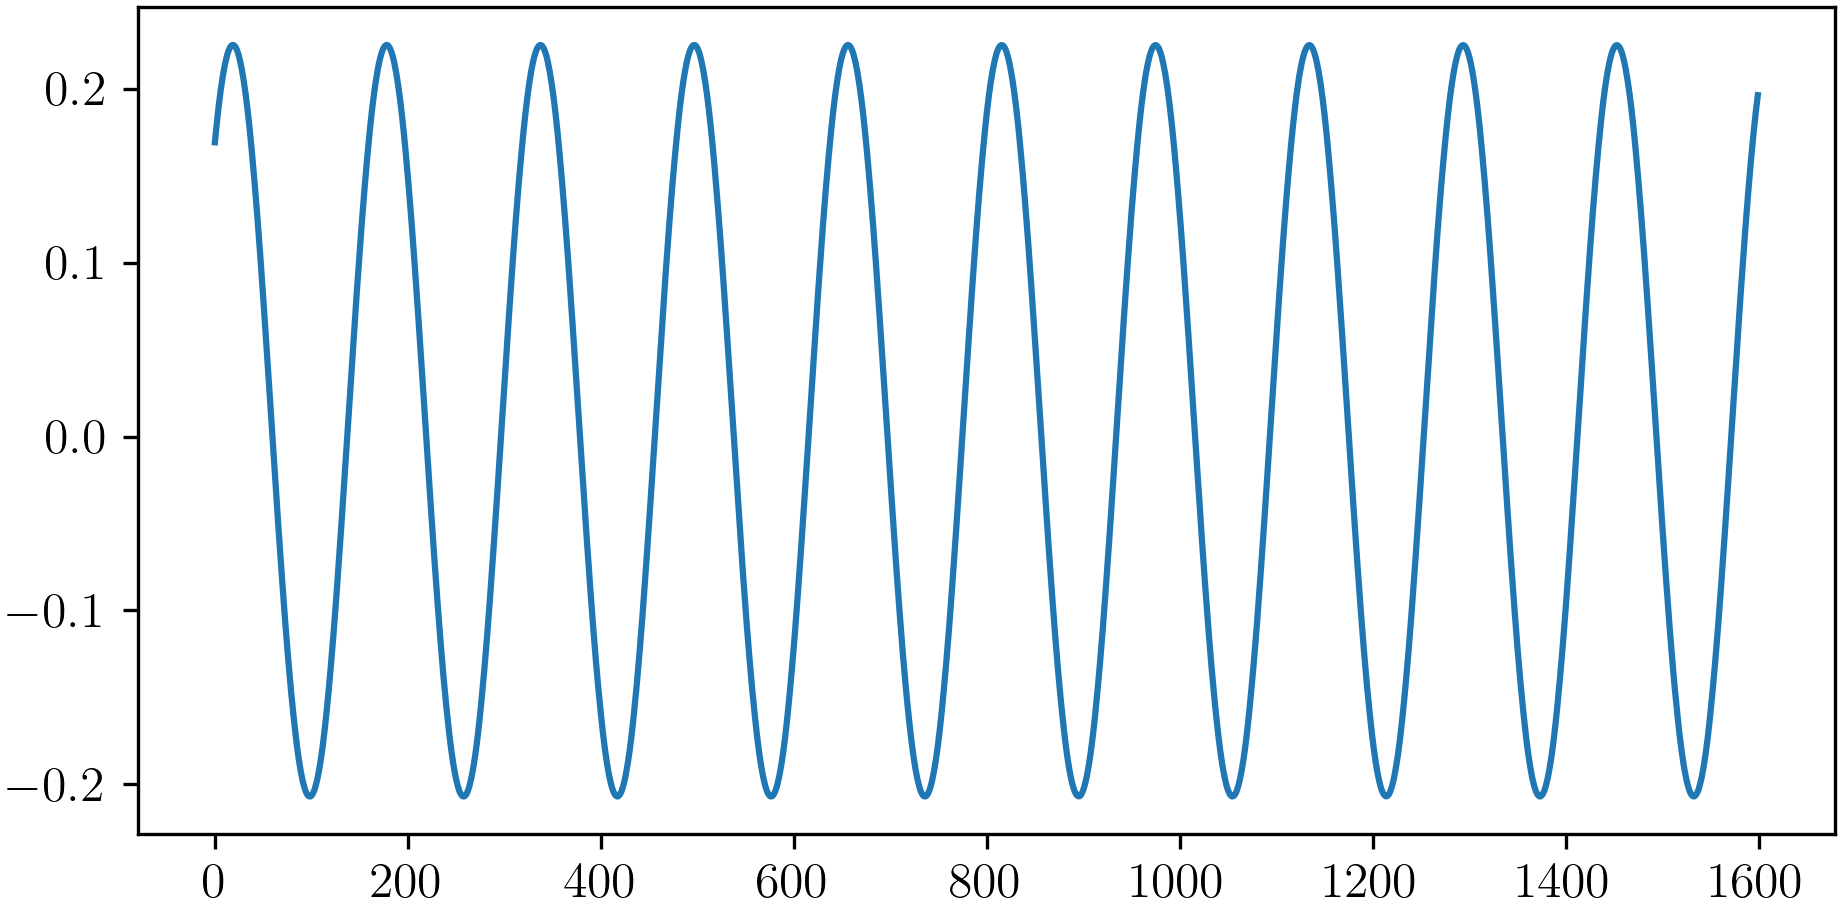

In [10]:
window_size = 5*320
plt.plot(z[500:500+window_size])

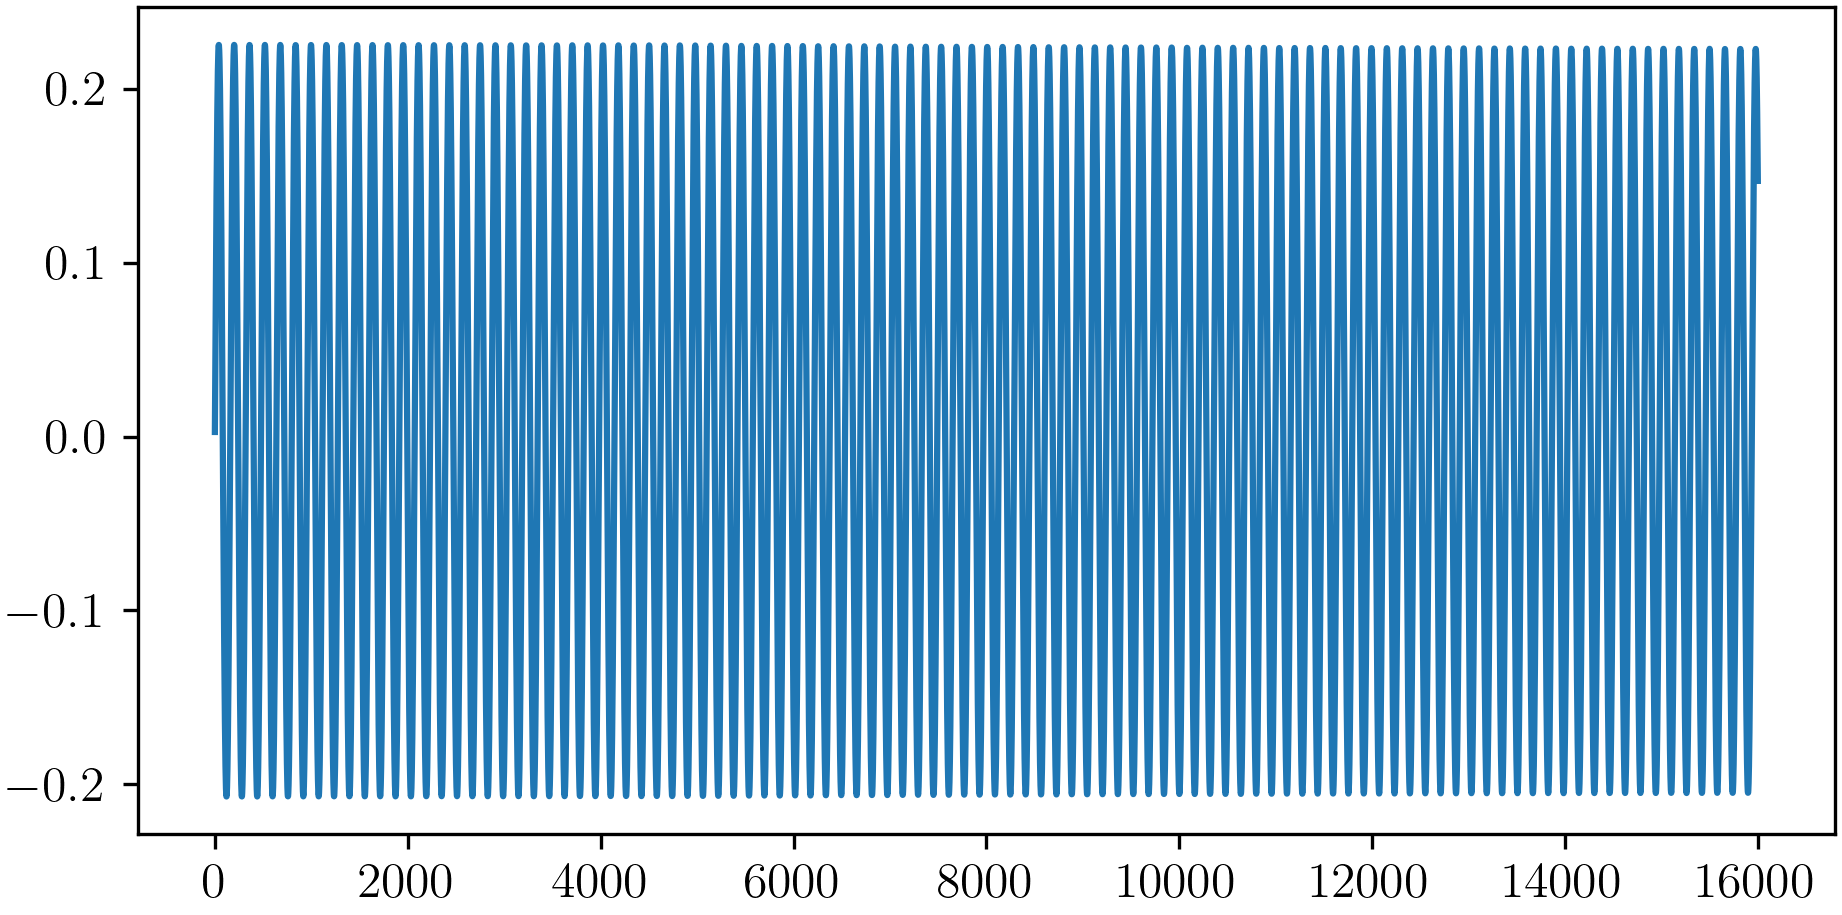

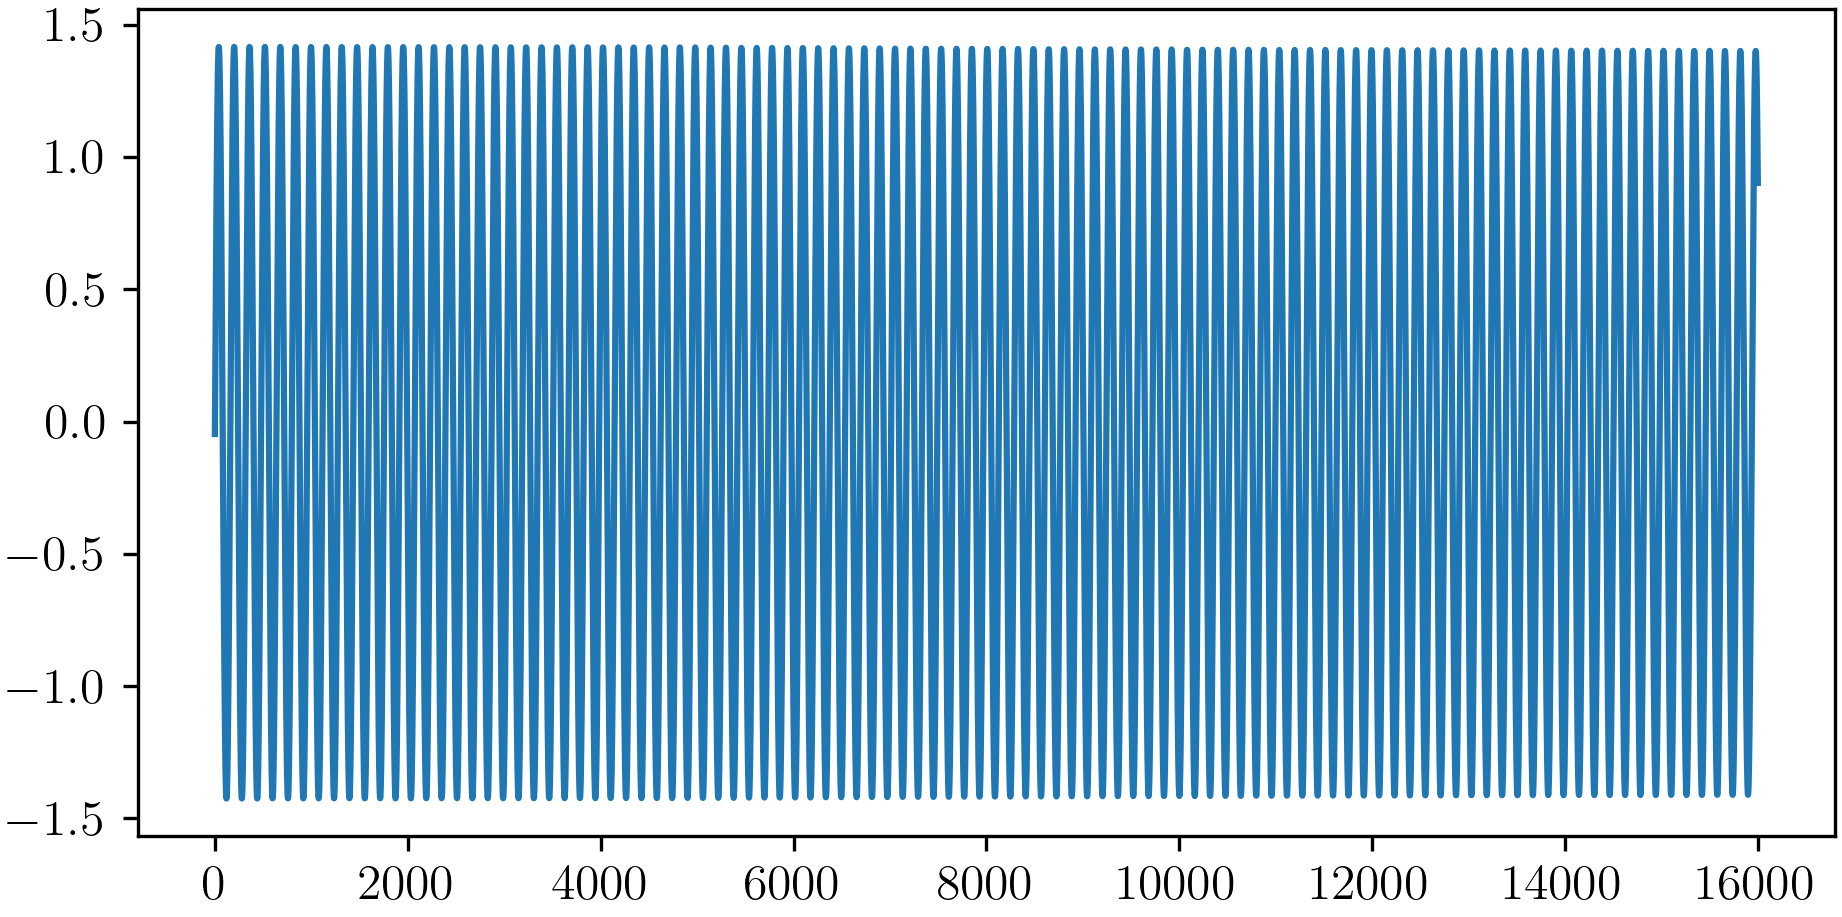

In [5]:
z = z.flatten()
z_signal = (z-np.mean(z))/np.std(z)

plt.plot(z)
plt.figure()
plt.plot(z_signal)

In [6]:
%%time

######################
##  Analyze by NFMD ##
######################

# Prep the 1D signal
#z_signal = z_signal + 1
z_signal = z + 1

nfmd_opts = {'num_freqs':2, 'window_size':window_size}
nfmd_pix = NFMDPixel(z_signal, nfmd_opts)

nfmd_pix.analyze(dt=dt)

Wall time: 13.5 s


In [7]:
nfmd_pix.modes

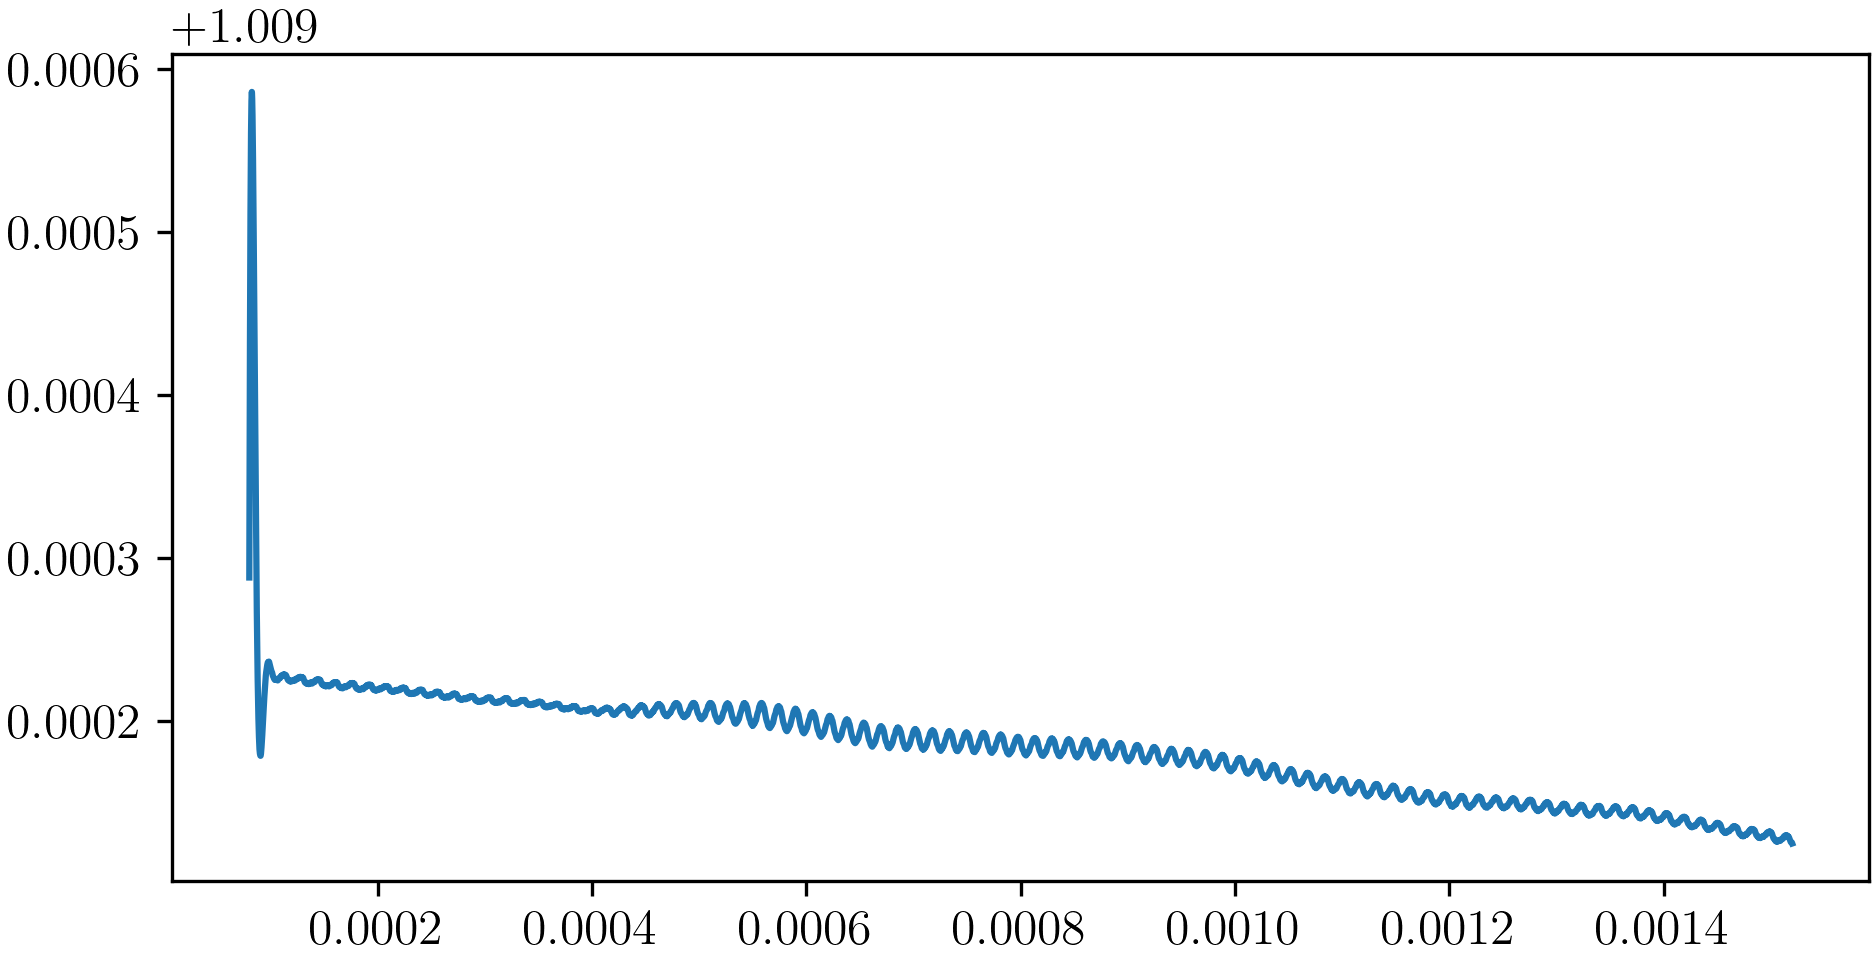

In [8]:
plt.plot(nfmd_pix.mean_t, nfmd_pix.mean)
#plt.ylim([-1e-4,1e-4])

No handles with labels found to put in legend.


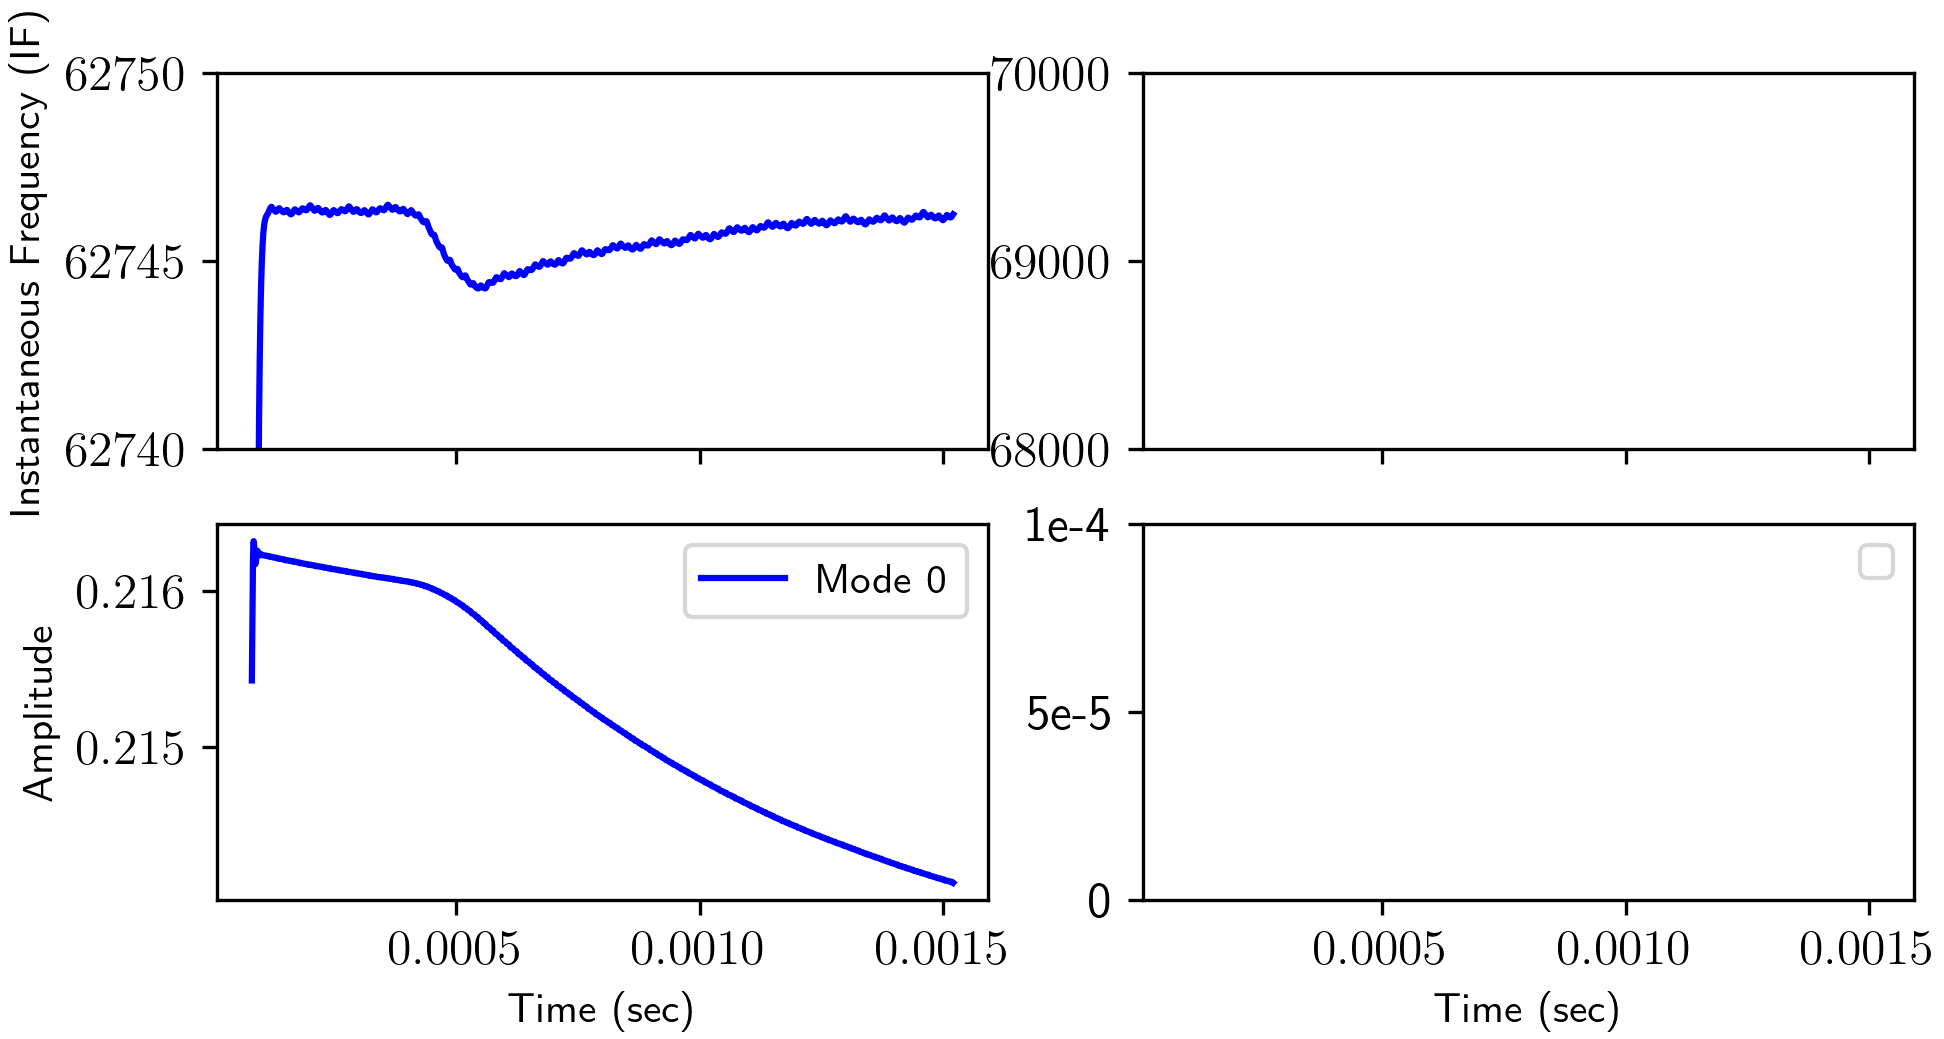

In [9]:
fig, [ax1, ax2] = plt.subplots(2,2,sharex=True)

colors=['blue','brown']

for i, mode in enumerate(nfmd_pix.modes):
    ax1[i].plot(mode.t, mode.IF, color=colors[i])
    ax2[i].plot(mode.t, mode.IA, color=colors[i], label="Mode {}".format(i))

ax1[0].set_ylabel("Instantaneous Frequency (IF)")
ax2[0].set_ylabel("Amplitude")
ax2[0].set_xlabel("Time (sec)")
ax2[1].set_xlabel("Time (sec)")
ax2[0].legend()
ax2[1].legend()

ax1[0].set_ylim([62740,62750])
ax1[1].set_ylim([6.8e4,7e4])
ax2[1].set_ylim([0,1e-4])
ax2[1].set_yticklabels(["0", "5e-5", "1e-4"])

plt.show()